In [5]:
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
map = folium.Map(location=[44.80401, 20.46513], zoom_start=7)
folium.TileLayer('cartodbpositron').add_to(map)

data = pd.read_excel('najv.xlsx')
df = pd.DataFrame(data)
data2 = pd.read_excel('najm.xlsx')
df2 = pd.DataFrame(data)

for i, row in data.iterrows():
    folium.Circle(
        location = [row["LAT"], row["LON"]],
        color="#69b3a2",
        fill=True,
        radius=float(data.iloc[i]['BROJ_VAKCINISANIH'])/20,
        tooltip=folium.map.Tooltip(
        'Opstina ' + data.iloc[i]['OPSTINA'] + ',' ' vakcinisano ' + str(data.iloc[i]['BROJ_VAKCINISANIH']),
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"))
    ).add_to(map)
    
for i, row in data2.iterrows():
    folium.Circle(
        location = [row["LATI"], row["LONG"]],
        color="#C12768",
        fill=True,
        radius=float(data2.iloc[i]['BRVAK'])/5,
        tooltip=folium.map.Tooltip(
        'Opstina ' + data2.iloc[i]['OPST'] + ',' ' vakcinisano ' + str(data2.iloc[i]['BRVAK']),
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"))
    ).add_to(map)    
    
map

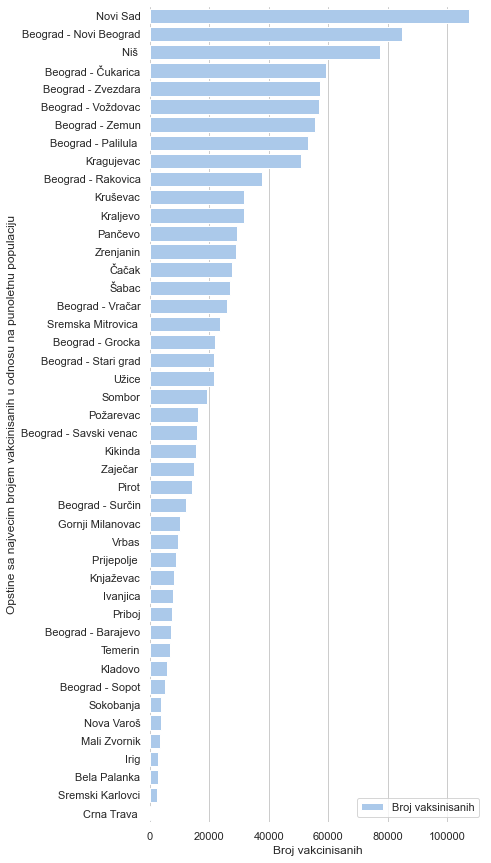

In [20]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 15))
data_sort = data.sort_values("BROJ_VAKCINISANIH", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="BROJ_VAKCINISANIH", y="OPSTINA", data=data_sort, label="Broj vaksinisanih", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Broj vakcinisanih", ylabel="Opstine sa najvecim brojem vakcinisanih u odnosu na punoletnu populaciju")
sns.despine(left=True, bottom=True)

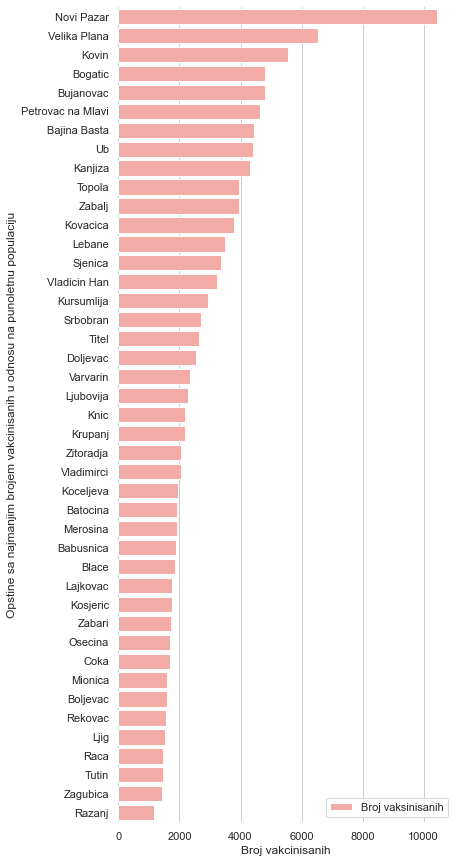

In [23]:
f, ax = plt.subplots(figsize=(6, 15))

data2_sort = data2.sort_values("BRVAK", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="BRVAK", y="OPST", data=data2_sort, label="Broj vaksinisanih", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Broj vakcinisanih", ylabel="Opstine sa najmanjim brojem vakcinisanih u odnosu na punoletnu populaciju")
sns.despine(left=True, bottom=True)